## Voting Classifier

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

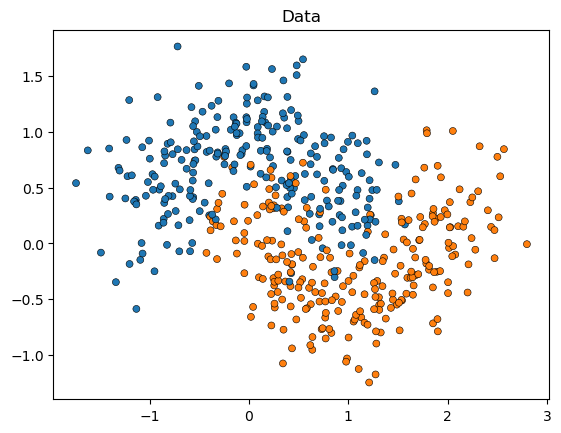

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()


VotingClassifier - Классификатор мягкого голосования/правила большинства для неподходящих оценщиков.
- voting{‘hard’, ‘soft’}, default=’hard’ , по умолчанию = ‘hard’
Если ‘hard’, использует предсказанные метки классов для голосования по правилу большинства. В противном случае, если ‘soft’, предсказывает метку класса на основе argmax сумм предсказанных вероятностей, что рекомендуется для ансамбля хорошо откалиброванных классификаторов.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
dtr_clf = DecisionTreeClassifier( random_state=42)
svm_clf = SVC(gamma="auto", random_state=42,probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dtr', dtr_clf), ('svc', svm_clf)],
    voting='soft')

In [85]:
log_clf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [94]:
y_pred1 = log_clf.predict_proba(X_test)


In [96]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [99]:
y_pred1

array([[0.49973467, 0.50026533],
       [0.82456017, 0.17543983],
       [0.72681452, 0.27318548],
       [0.02581898, 0.97418102],
       [0.13387194, 0.86612806],
       [0.14114308, 0.85885692],
       [0.99204844, 0.00795156],
       [0.96306824, 0.03693176],
       [0.64102614, 0.35897386],
       [0.95892449, 0.04107551],
       [0.02683774, 0.97316226],
       [0.9822897 , 0.0177103 ],
       [0.17341102, 0.82658898],
       [0.2015624 , 0.7984376 ],
       [0.11357071, 0.88642929],
       [0.94177358, 0.05822642],
       [0.95186714, 0.04813286],
       [0.06612682, 0.93387318],
       [0.20644114, 0.79355886],
       [0.83329131, 0.16670869],
       [0.9297645 , 0.0702355 ],
       [0.36520365, 0.63479635],
       [0.41563752, 0.58436248],
       [0.69610277, 0.30389723],
       [0.91045614, 0.08954386],
       [0.75942432, 0.24057568],
       [0.44162033, 0.55837967],
       [0.98173654, 0.01826346],
       [0.04530655, 0.95469345],
       [0.98158876, 0.01841124],
       [0.

y_pred1

In [98]:
y_pred2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [100]:
y_pred3

array([[0.56087847, 0.43912153],
       [0.88320857, 0.11679143],
       [0.74676475, 0.25323525],
       [0.0271916 , 0.9728084 ],
       [0.01911031, 0.98088969],
       [0.03481492, 0.96518508],
       [0.96780772, 0.03219228],
       [0.98130726, 0.01869274],
       [0.46224849, 0.53775151],
       [0.96886011, 0.03113989],
       [0.01774312, 0.98225688],
       [0.9749957 , 0.0250043 ],
       [0.01817257, 0.98182743],
       [0.17053988, 0.82946012],
       [0.01310095, 0.98689905],
       [0.93421631, 0.06578369],
       [0.98152287, 0.01847713],
       [0.00963758, 0.99036242],
       [0.19318391, 0.80681609],
       [0.97278194, 0.02721806],
       [0.93150551, 0.06849449],
       [0.00722342, 0.99277658],
       [0.47857715, 0.52142285],
       [0.82243298, 0.17756702],
       [0.89025473, 0.10974527],
       [0.88460869, 0.11539131],
       [0.11297514, 0.88702486],
       [0.9780998 , 0.0219002 ],
       [0.01587706, 0.98412294],
       [0.96966265, 0.03033735],
       [0.

In [87]:
dtr_clf.fit(X_train, y_train)
y_pred2 = dtr_clf.predict_proba(X_test)


In [88]:
svm_clf.fit(X_train, y_train)
y_pred3 = svm_clf.predict_proba(X_test)


In [101]:
import numpy as np
a = np.array((y_pred1+y_pred2+y_pred3))
# a=a.astype(np.int32)
# accuracy_score(y_test, a)

In [102]:
a

array([[1.06061314, 1.93938686],
       [2.70776874, 0.29223126],
       [1.47357926, 1.52642074],
       [0.05301058, 2.94698942],
       [0.15298225, 2.84701775],
       [1.17595801, 1.82404199],
       [2.95985615, 0.04014385],
       [2.9443755 , 0.0556245 ],
       [2.10327462, 0.89672538],
       [2.9277846 , 0.0722154 ],
       [0.04458087, 2.95541913],
       [2.9572854 , 0.0427146 ],
       [0.19158359, 2.80841641],
       [0.37210228, 2.62789772],
       [0.12667166, 2.87332834],
       [2.87598989, 0.12401011],
       [2.93339001, 0.06660999],
       [0.07576441, 2.92423559],
       [1.39962505, 1.60037495],
       [2.80607324, 0.19392676],
       [2.86127   , 0.13873   ],
       [0.37242707, 2.62757293],
       [0.89421467, 2.10578533],
       [2.51853575, 0.48146425],
       [2.80071086, 0.19928914],
       [2.64403301, 0.35596699],
       [0.55459547, 2.44540453],
       [2.95983634, 0.04016366],
       [0.06118361, 2.93881639],
       [2.95125141, 0.04874859],
       [0.

a

In [90]:
np.argmax(a,axis=1)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [91]:
accuracy_score(y_test, np.argmax(a,axis=1))

0.92

In [92]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('dtr', DecisionTreeClassifier(random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [93]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, dtr_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.856
SVC 0.888
VotingClassifier 0.92


In [21]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
dtr_clf = DecisionTreeClassifier( random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
   estimators=[('lr', log_clf), ('dtr', dtr_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('dtr', DecisionTreeClassifier(random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [22]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, dtr_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.856
SVC 0.888
VotingClassifier 0.92
